In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import gmaps
import requests
import json
from config import gkey
from IPython.display import display
import ipywidgets as widgets

In [2]:
delhi_csv = "CleanDatasets/delhi_final.csv"

In [3]:
delhi_data = pd.read_csv(delhi_csv)
delhi_data.head()

,date,pm25,pm10,o3,no2,so2,co
0,2020-07-02,139,87,17,13,9,14
1,2020-07-03,147,93,13,14,10,14
2,2020-07-04,155,71,10,11,9,12
3,2020-07-05,125,43,11,10,8,12
4,2020-07-06,85,68,5,12,8,12


In [4]:
delhi_data[['year','month','day']] = delhi_data['date'].str.split('-',expand=True)

In [5]:
delhi_data.head()

,date,pm25,pm10,o3,no2,so2,co,year,month,day
0,2020-07-02,139,87,17,13,9,14,2020,07,02
1,2020-07-03,147,93,13,14,10,14,2020,07,03
2,2020-07-04,155,71,10,11,9,12,2020,07,04
3,2020-07-05,125,43,11,10,8,12,2020,07,05
4,2020-07-06,85,68,5,12,8,12,2020,07,06


In [6]:
delhi_data['month'] = delhi_data['month'].astype(str).astype(int)

In [7]:
delhi_data['month'] = delhi_data['month'].apply(lambda x: calendar.month_abbr[x])

In [8]:
delhi_data.head()

,date,pm25,pm10,o3,no2,so2,co,year,month,day
0,2020-07-02,139,87,17,13,9,14,2020,Jul,02
1,2020-07-03,147,93,13,14,10,14,2020,Jul,03
2,2020-07-04,155,71,10,11,9,12,2020,Jul,04
3,2020-07-05,125,43,11,10,8,12,2020,Jul,05
4,2020-07-06,85,68,5,12,8,12,2020,Jul,06


In [9]:
delhi_data['day'] = delhi_data['day'].astype(str).astype('int64')

In [10]:
delhi_data['year'] = delhi_data['year'].astype(str).astype('int64')

In [11]:
delhi_data['month'] = delhi_data['month'].astype(str).astype('category')

In [24]:
delhi_data.sort_values(by='date', ascending=False)

,date,pm25,pm10,o3,no2,so2,co,year,month,day
20,2020-07-22,90,39,3,12,7,10,2020,Jul,22
19,2020-07-21,77,45,3,12,7,10,2020,Jul,21
18,2020-07-20,97,53,8,13,8,11,2020,Jul,20
17,2020-07-19,119,45,2,11,8,10,2020,Jul,19
16,2020-07-18,132,66,4,12,8,11,2020,Jul,18
...,...,...,...,...,...,...,...,...,...,...
188,2019-11-05,400,239,17,22,7,13,2019,Nov,5
187,2019-11-04,828,389,9,24,6,17,2019,Nov,4
186,2019-11-03,384,925,5,20,6,31,2019,Nov,3
185,2019-11-02,495,367,6,26,8,18,2019,Nov,2


In [32]:
delhiaq = delhi_data.pivot('month','day',' pm25')

In [35]:
delhiaq = calendar.reindex('months')

AttributeError: module 'calendar' has no attribute 'reindex'

ValueError: Unknown format code 'd' for object of type 'float'

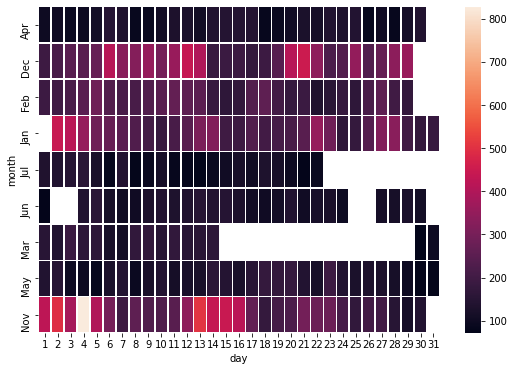

In [33]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(delhiaq, annot=True, fmt="d", linewidths=.5, ax=ax)

In [15]:
# Target city
target_city = "Delhi, India"

# Build the endpoint URL
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, gkey)

In [16]:
# Run a request to endpoint and convert result to json
geo_data = requests.get(target_url).json()

# Print the json (pretty printed)
print(json.dumps(geo_data, indent=4, sort_keys=True))

{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "Delhi",
                    "short_name": "DL",
                    "types": [
                        "administrative_area_level_1",
                        "political"
                    ]
                },
                {
                    "long_name": "India",
                    "short_name": "IN",
                    "types": [
                        "country",
                        "political"
                    ]
                }
            ],
            "formatted_address": "Delhi, India",
            "geometry": {
                "bounds": {
                    "northeast": {
                        "lat": 28.881338,
                        "lng": 77.3484578
                    },
                    "southwest": {
                        "lat": 28.412593,
                        "lng": 76.83806899999999
                    }
                },
   

In [17]:
# Extract latitude and longitude
delhilat = geo_data["results"][0]["geometry"]["location"]["lat"]
delhilng = geo_data["results"][0]["geometry"]["location"]["lng"]

# Print the latitude and longitude
print('''
    City: {0}
    Latitude: {1}
    Longitude: {2}
    '''.format(target_city, delhilat, delhilng))


    City: Delhi, India
    Latitude: 28.7040592
    Longitude: 77.10249019999999
    


In [20]:
delhi_data[' pm25'].max()

828

In [21]:
delhi1 = delhi_data.assign(Latitude=delhilat)

In [23]:
delhi = delhi1.assign(Longitude=delhilng)
delhi.head()

,date,pm25,pm10,o3,no2,so2,co,year,month,day,Latitude,Longitude
0,2020-07-02,139,87,17,13,9,14,2020,Jul,2,28.704059,77.10249
1,2020-07-03,147,93,13,14,10,14,2020,Jul,3,28.704059,77.10249
2,2020-07-04,155,71,10,11,9,12,2020,Jul,4,28.704059,77.10249
3,2020-07-05,125,43,11,10,8,12,2020,Jul,5,28.704059,77.10249
4,2020-07-06,85,68,5,12,8,12,2020,Jul,6,28.704059,77.10249
